In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import geopandas as gpd
from shapely.geometry import Point, Polygon


%matplotlib inline

In [4]:
engine = create_engine("sqlite:///mta.db")

In [ ]:
#import folium 
#from folium import plugins

In [ ]:
#geo_data="nyc-zip-code-tabulation-areas-polygons.geojson"

In [5]:
tmp = pd.read_sql("select * from final_stations_listv4", engine)

In [6]:
tmp.head()

,borough_label,station,station_entries_pct_chag
0,Staten Island,ST. GEORGE,17400.00
1,Queens,COURT SQ-23 ST,58400.00
2,Queens,AQUEDUCT RACETR,21800.00
3,Queens,BEACH 60 ST,20380.00
4,Queens,PARSONS BLVD,4345.18


In [7]:
stations = pd.read_csv("Stations_cleaned.csv")
stations.head()

,Station ID,Division,Stop Name,Borough,Structure,GTFS Latitude,GTFS Longitude
0,1.0,BMT,Astoria Ditmars,Q,Elevated,40.775036,-73.912034
1,2.0,BMT,Astoria Blvd,Q,Elevated,40.770258,-73.917843
2,3.0,BMT,30 Av,Q,Elevated,40.766779,-73.921479
3,4.0,BMT,Broadway,Q,Elevated,40.761820,-73.925508
4,5.0,BMT,36 Av,Q,Elevated,40.756804,-73.929575


In [12]:
stations["station"] = stations["Stop Name"].str.upper()
stations.head()

,Station ID,Division,Stop Name,Borough,Structure,GTFS Latitude,GTFS Longitude,station
0,1.0,BMT,Astoria Ditmars,Q,Elevated,40.775036,-73.912034,ASTORIA DITMARS
1,2.0,BMT,Astoria Blvd,Q,Elevated,40.770258,-73.917843,ASTORIA BLVD
2,3.0,BMT,30 Av,Q,Elevated,40.766779,-73.921479,30 AV
3,4.0,BMT,Broadway,Q,Elevated,40.761820,-73.925508,BROADWAY
4,5.0,BMT,36 Av,Q,Elevated,40.756804,-73.929575,36 AV


In [13]:
tmp2 = tmp.merge(stations,
                on ="station",
                how = 'inner')

In [14]:
tmp2.head()

,borough_label,station,station_entries_pct_chag,Station ID,Division,Stop Name,Borough,Structure,GTFS Latitude,GTFS Longitude
0,Staten Island,ST. GEORGE,17400.00,501.0,SRT,St. George,SI,Open Cut,40.643748,-74.073643
1,Queens,AQUEDUCT RACETR,21800.00,196.0,IND,Aqueduct Racetr,Q,At Grade,40.672097,-73.835919
2,Queens,BEACH 60 ST,20380.00,205.0,IND,Beach 60 St,Q,Viaduct,40.592374,-73.788522
3,Queens,PARSONS BLVD,4345.18,256.0,IND,Parsons Blvd,Q,Subway,40.707564,-73.803326
4,Queens,63 DR-REGO PARK,2628.21,263.0,IND,63 Dr-Rego Park,Q,Subway,40.729846,-73.861604


In [31]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import pyproj

import sys
import pyproj
from pyproj import CRS
import geopandas

In [32]:
crs=CRS('EPSG:4326')

geometry = [Point(xy) for xy in zip(tmp2['GTFS Longitude'], tmp2['GTFS Latitude'])]
geo_df = gpd.GeoDataFrame(tmp2,crs = crs,geometry = geometry)

street_map = gpd.read_file("geo_export_ac8d36ce-6ec1-48a0-a08a-50385976b1bf.shp")

''

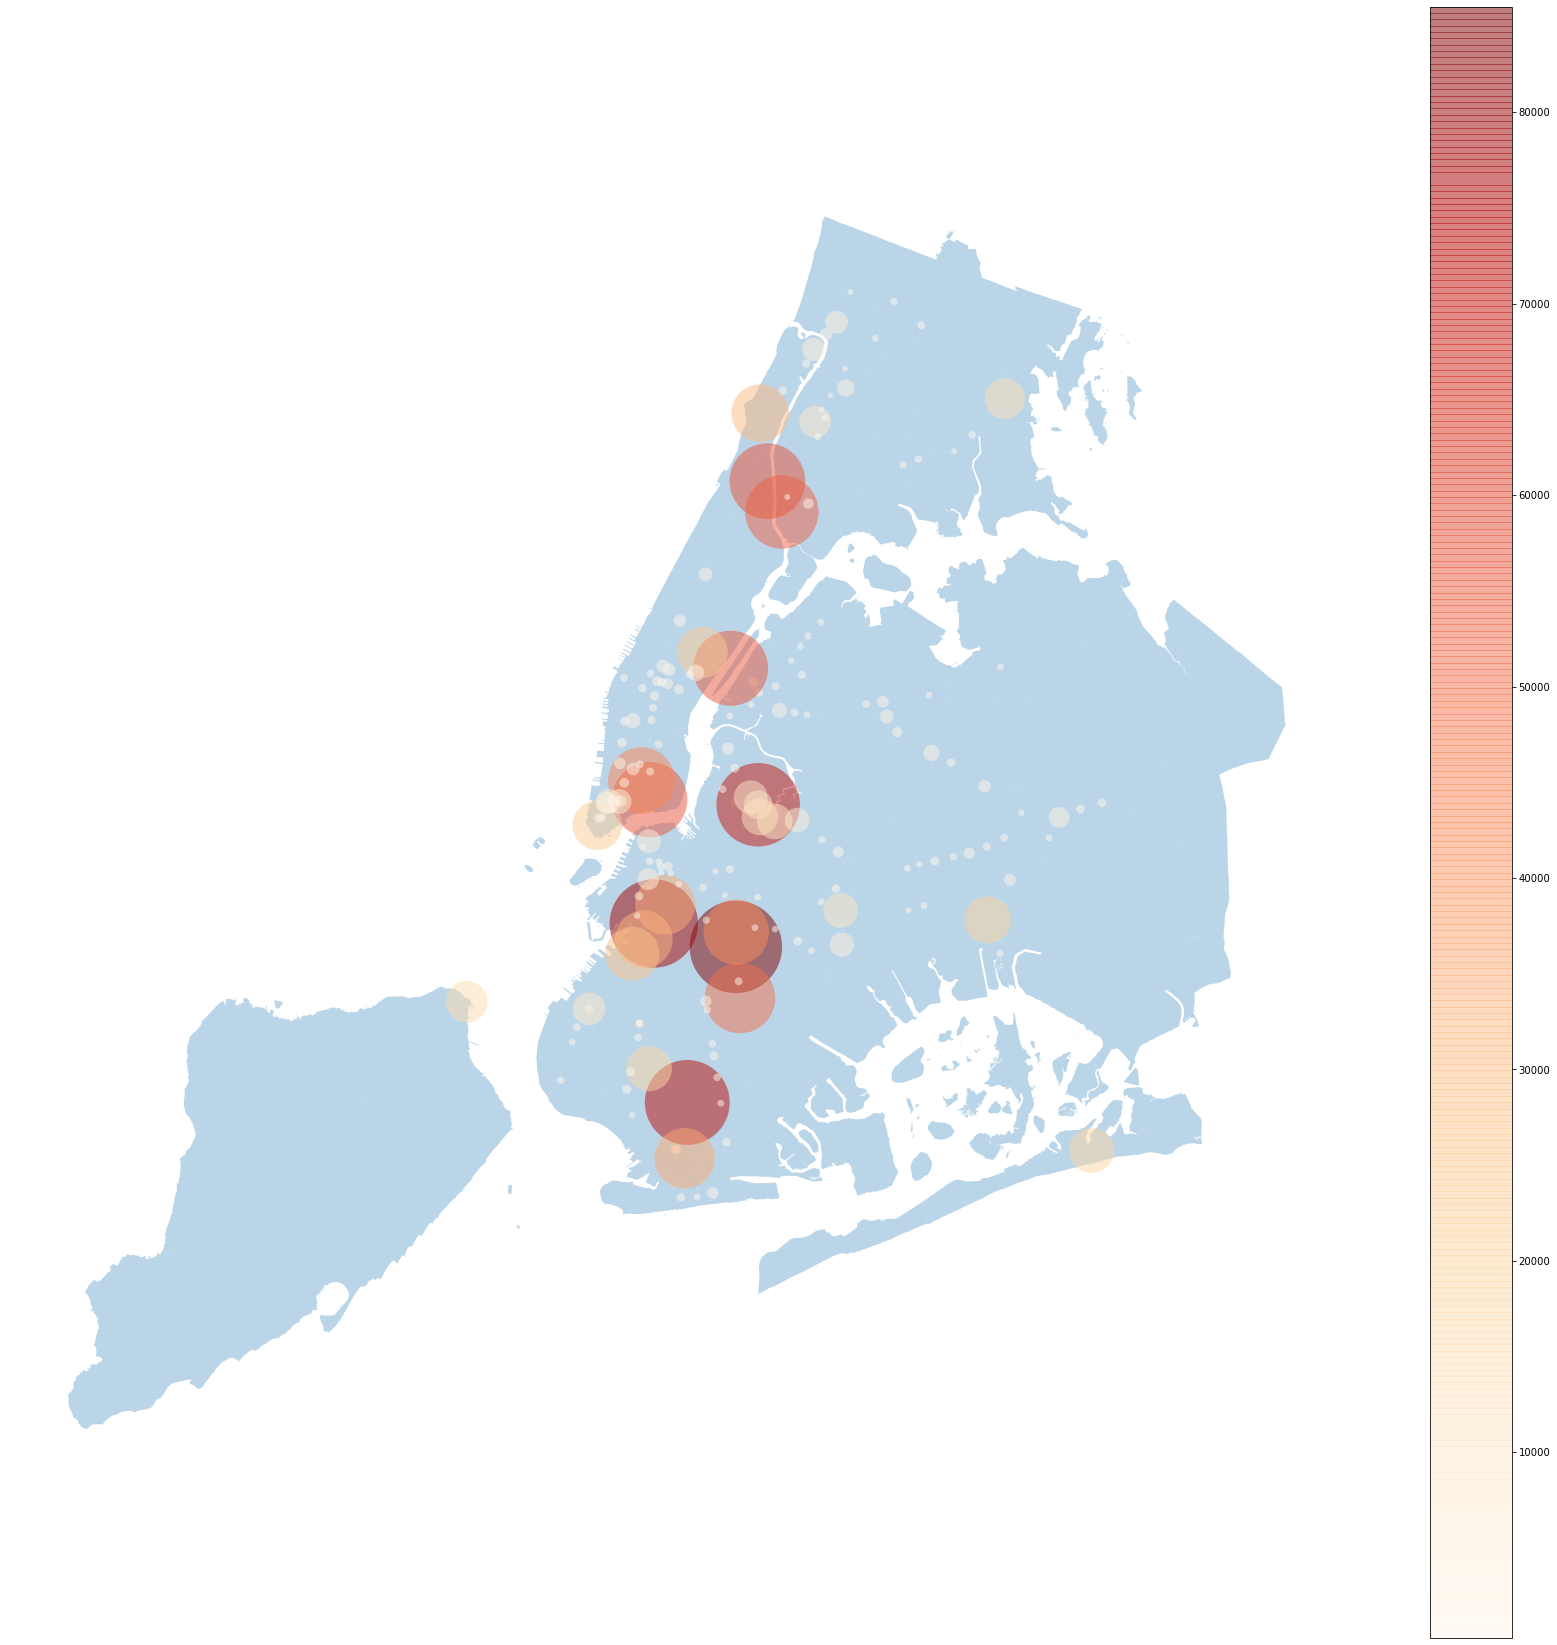

In [91]:
fig, ax = plt.subplots(figsize=(30,30))
street_map.plot(ax=ax, alpha=0.3)

plt.scatter(tmp2['GTFS Longitude'], tmp2['GTFS Latitude'], label=tmp2.station,
            c=tmp2.station_entries_pct_chag, cmap='OrRd',
            s=tmp2.station_entries_pct_chag/10, linewidth=0, alpha=0.5)

plt.colorbar()


ax.axis('off')

;